In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US.salary_year_avg.sample(10)

606615    105000.0
372284     80850.0
8192      115000.0
433206    109164.0
547461     49546.0
262181     90000.0
439987    141400.0
648069    127500.0
609204     75000.0
94380      90000.0
Name: salary_year_avg, dtype: float64

<Axes: >

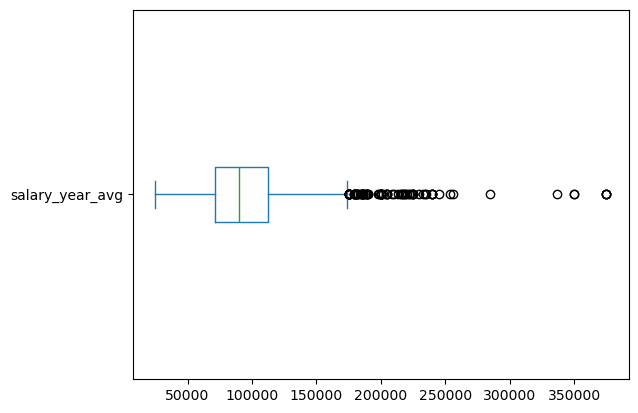

In [4]:
df_DA_US.salary_year_avg.plot(kind='box')

In [15]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])


C:\Users\nhemh\AppData\Local\Temp\ipykernel_13820\3447410399.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


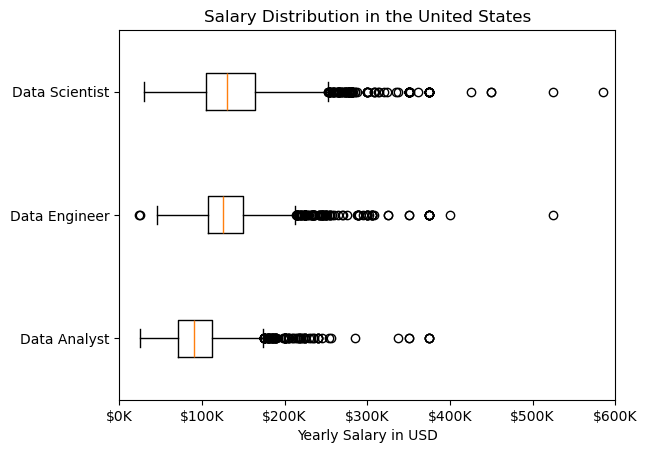

In [20]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary in USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.xlim(0, 600000)
plt.show()

Problems